In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("input/Data_Entry_2017_v2020.csv", index_col="Image Index")
df.head()

,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
Image Index,,,,,,,,,,
00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df["finding_labels"] = df["finding_labels"].str.lower()

diseases = [
    "atelectasis", "cardiomegaly", "effusion", "infiltration", "mass", "nodule", "pneumonia", "pneumothorax", 
    "consolidation", "edema", "emphysema", "fibrosis", "pleural_thickening", "hernia", "no_finding"
]

for new_col in diseases:
    df[new_col] = 0

df["finding_labels"] = df["finding_labels"].str.replace(" ", "_")
df["sep_labels"] = df["finding_labels"].str.split("|")
    
df.head(10)

,finding_labels,follow-up_#,patient_id,patient_age,patient_gender,view_position,originalimage[width,height],originalimagepixelspacing[x,y],...,pneumonia,pneumothorax,consolidation,edema,emphysema,fibrosis,pleural_thickening,hernia,no_finding,sep_labels
Image Index,,,,,,,,,,,,,,,,,,,,,
00000001_000.png,cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,...,0,0,0,0,0,0,0,0,0,[cardiomegaly]
00000001_001.png,cardiomegaly|emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,...,0,0,0,0,0,0,0,0,0,"[cardiomegaly, emphysema]"
00000001_002.png,cardiomegaly|effusion,2,1,58,M,PA,2500,2048,0.168,0.168,...,0,0,0,0,0,0,0,0,0,"[cardiomegaly, effusion]"
00000002_000.png,no_finding,0,2,80,M,PA,2500,2048,0.171,0.171,...,0,0,0,0,0,0,0,0,0,[no_finding]
00000003_001.png,hernia,0,3,74,F,PA,2500,2048,0.168,0.168,...,0,0,0,0,0,0,0,0,0,[hernia]
00000003_002.png,hernia,1,3,75,F,PA,2048,2500,0.168,0.168,...,0,0,0,0,0,0,0,0,0,[hernia]
00000003_003.png,hernia|infiltration,2,3,76,F,PA,2698,2991,0.143,0.143,...,0,0,0,0,0,0,0,0,0,"[hernia, infiltration]"
00000003_004.png,hernia,3,3,77,F,PA,2500,2048,0.168,0.168,...,0,0,0,0,0,0,0,0,0,[hernia]
00000003_005.png,hernia,4,3,78,F,PA,2686,2991,0.143,0.143,...,0,0,0,0,0,0,0,0,0,[hernia]


In [4]:
for row, entry in enumerate(df["sep_labels"]):
    df.loc[df.index[row], entry] = 1

df.head()

,finding_labels,follow-up_#,patient_id,patient_age,patient_gender,view_position,originalimage[width,height],originalimagepixelspacing[x,y],...,pneumonia,pneumothorax,consolidation,edema,emphysema,fibrosis,pleural_thickening,hernia,no_finding,sep_labels
Image Index,,,,,,,,,,,,,,,,,,,,,
00000001_000.png,cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,...,0,0,0,0,0,0,0,0,0,[cardiomegaly]
00000001_001.png,cardiomegaly|emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,...,0,0,0,0,1,0,0,0,0,"[cardiomegaly, emphysema]"
00000001_002.png,cardiomegaly|effusion,2,1,58,M,PA,2500,2048,0.168,0.168,...,0,0,0,0,0,0,0,0,0,"[cardiomegaly, effusion]"
00000002_000.png,no_finding,0,2,80,M,PA,2500,2048,0.171,0.171,...,0,0,0,0,0,0,0,0,1,[no_finding]
00000003_001.png,hernia,0,3,74,F,PA,2500,2048,0.168,0.168,...,0,0,0,0,0,0,0,1,0,[hernia]


In [5]:
diseases_df = df[diseases].apply(pd.Series.value_counts)
diseases_df

,atelectasis,cardiomegaly,effusion,infiltration,mass,nodule,pneumonia,pneumothorax,consolidation,edema,emphysema,fibrosis,pleural_thickening,hernia,no_finding
0,100561,109344,98803,92226,106338,105789,110689,106818,107453,109817,109604,110434,108735,111893,51759
1,11559,2776,13317,19894,5782,6331,1431,5302,4667,2303,2516,1686,3385,227,60361


## Occurence of each disease in dataset (percentage)

In [6]:
round((diseases_df.loc[1]/diseases_df.sum(axis=0))*100, 2)

atelectasis           10.31
cardiomegaly           2.48
effusion              11.88
infiltration          17.74
mass                   5.16
nodule                 5.65
pneumonia              1.28
pneumothorax           4.73
consolidation          4.16
edema                  2.05
emphysema              2.24
fibrosis               1.50
pleural_thickening     3.02
hernia                 0.20
no_finding            53.84
dtype: float64

<AxesSubplot:>

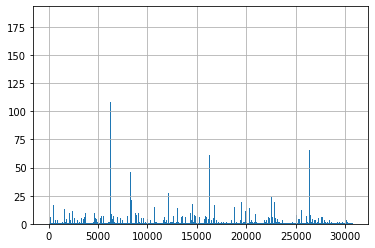

In [7]:
df.patient_id.hist(bins=df.patient_id.nunique())

<AxesSubplot:>

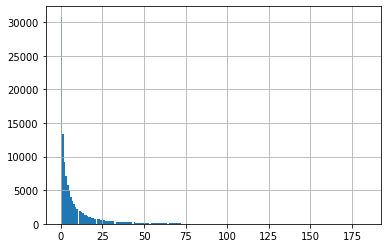

In [8]:
df["follow-up_#"].hist(bins=200)